# Visualization of CAR map
Results calculated in R
Visualizing in Python
## Model 2

In [1]:
%matplotlib inline
import sys
sys.path.append('/apps')
import django
django.setup()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
## Use the ggplot style
plt.style.use('ggplot')

In [2]:
#file = '/outputs/presence_only_models/predictors/dataset100x100-puebla-p9/0-pred.csv'
#PDF = read.csv(file)
## REad adjancency matrix
mat_filename = "/outputs/training_data_sample_puebla_p9_abies_pinophyta_adjmat.npy"


TDF = pd.read_csv("/outputs/training_data_sample_puebla_p9_abies_pinophyta.csv")
## Order it according to the id of the cell
## This is important because the adjancy matrix rows need to be the same

TDF.sort_values(by='cell_ids',inplace=True)

    

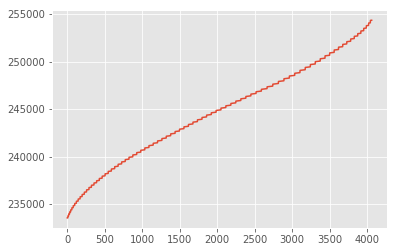

In [3]:
plt.plot(TDF.cell_ids.values)

In [4]:
import utilities.data_extraction as de
nTDF = de.toGeoDataFrame(TDF,xcoord_name='Longitude',ycoord_name='Latitude')

## Extract the polygons from cells


In [5]:
from mesh.models import initMesh
from django.contrib.gis.geos import Point, Polygon
#coord = -99.76
#coord = 17.55
#xcoord = -98.219
#ycoord = 19.05
xcoord = -97.237
ycoord = 19.482
p = Point(xcoord,ycoord,srid=4326)
radii = np.linspace(0.08,2,10)
polys = map(lambda r : p.buffer(r),radii)
mexmesh = initMesh(11)
## restrict the polygons to the polygon n 3
polys = [polys[9]]
intersected_cells = map(lambda poly : mexmesh.objects.filter(cell__intersects=poly),polys)
# Number of selected cells in each buffer
values = map(lambda l : list(l.values_list('id',flat=True)),intersected_cells)
## Change to network database
from traversals.strategies import idsToCells
cells = map(lambda level : list(idsToCells(level)),values)


import shapely.wkt as wkt



DEBUG Changed MESH TABLE SPACE
INFO Compiling Query and asking the Graph Database


In [6]:
ids_poly = map(lambda c : (c.id,wkt.loads(c.polygon.wkt)),cells[0])

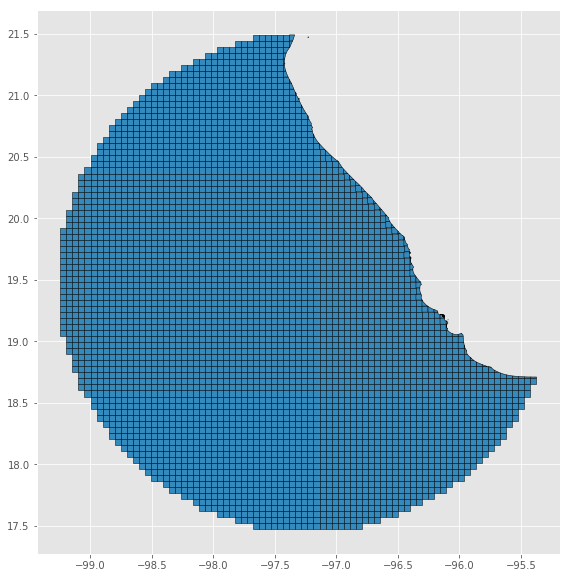

In [73]:
import geopandas as gpd
gg = gpd.GeoDataFrame(ids_poly,columns=['id','geometry'])
gg.set_geometry('geometry',inplace=True)
gg.set_index('id',inplace=True)
plt.rcParams['figure.figsize'] = [10, 10]
gg.plot(edgecolor='black')

In [74]:
TDF.columns

Index([u'Unnamed: 0', u'LUCA', u'Plantae', u'Pinophyta', u'Abies', u'cell_ids',
       u'Dist.to.road_m', u'Elevation_m', u'MaxTemp_m', u'MeanTemp_m',
       u'MinTemp_m', u'Population_m', u'Precipitation_m', u'SolarRadiation_m',
       u'VaporPres_m', u'WindSp_m', u'Longitude', u'Latitude', u'wwf_mhtnum',
       u'wwf_mhtnam', u'covid', u'name', u'cov_id', u'tipos', u'geometry'],
      dtype='object')

### Develop here new pseudo-absences strategies designs
This has been done in R. 
Let's see how we can use it from here

> IMPOSIBLE TO INSTALL new version of Rpy2 due to stupid python 2/7
Continue evading the problem, as the water....

In [75]:
# Read from csv

file_ = '/outputs/presence_only_models/modelCAR_model2_fitted.csv'
fitted_sample = pd.read_csv(file_)
fitted_sample = fitted_sample.drop(fitted_sample.columns[0],axis=1)
fitted_sample.set_index(fitted_sample.columns[0],inplace=True)
fitted_sample.set_index(fitted_sample.index.astype('int'),inplace=True)


In [76]:
## Join it with geodataframe
gdf = gg.join(fitted_sample,how='inner')

In [77]:
nTDF.columns

Index([u'Unnamed: 0', u'LUCA', u'Plantae', u'Pinophyta', u'Abies', u'cell_ids',
       u'Dist.to.road_m', u'Elevation_m', u'MaxTemp_m', u'MeanTemp_m',
       u'MinTemp_m', u'Population_m', u'Precipitation_m', u'SolarRadiation_m',
       u'VaporPres_m', u'WindSp_m', u'Longitude', u'Latitude', u'wwf_mhtnum',
       u'wwf_mhtnam', u'covid', u'name', u'cov_id', u'tipos', u'geometry'],
      dtype='object')

### Plot results

In [78]:
def plotillo(maxlim,minlim):
    f, ax = plt.subplots(1,figsize=(12,12))
    ax = gdf.plot(column='prob_pps',legend=True,cmap=plt.cm.RdYlBu,vmin=minlim,vmax=maxlim,axes = ax)
    nTDF[nTDF.Pinophyta > 0].plot(column='Pinophyta',axes=ax,s=3)
    plt.title("Probability of Presence (Pinophyta) | GMRF")
    plt.show()

In [79]:
from ipywidgets import interact_manual

In [80]:
interact_manual(plotillo, minlim=(0.0,1.0,0.1),maxlim=(0.0,1.0,0.1),continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtYXhsaW0nLCBtYXg9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGnigKY=


<function __main__.plotillo>

In [17]:
def plotillo(maxlim,minlim):
    f, ax = plt.subplots(1,figsize=(12,12))
    ax = gdf.plot(column='prob_pss',legend=True,cmap=plt.cm.RdYlBu,vmin=minlim,vmax=maxlim,ax=ax)
    nTDF[nTDF.Plantae > 0].plot(column='Plantae',axes=ax,s=3)
    plt.title("Probability of Sample Effort (Plants) | GMRF")
    plt.show()
interact_manual(plotillo, minlim=(0.0,1.0,0.1),maxlim=(0.0,1.0,0.1),continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtYXhsaW0nLCBtYXg9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGnigKY=


<function __main__.plotillo>

In [16]:
def plotillo(maxlim,minlim):

    f, ax = plt.subplots(1,figsize=(12,12))
    cm = plt.cm.RdYlBu
    ax = gdf.plot(column='probpres',legend=True,cmap=cm,vmin=minlim,vmax=maxlim,ax=ax)
    nTDF[nTDF.Pinophyta > 0].plot(column='Pinophyta',axes=ax,s=3)
    plt.title("Probability of Presence (Pinophyta)")
    plt.show()
interact_manual(plotillo, minlim=(0.0,1.0,0.1),maxlim=(0.0,1.0,0.1),continuous_update=False)

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEZsb2F0U2xpZGVyKHZhbHVlPTAuNSwgZGVzY3JpcHRpb249dSdtYXhsaW0nLCBtYXg9MS4wKSwgRmxvYXRTbGlkZXIodmFsdWU9MC41LCBkZXNjcmlwdGnigKY=


<function __main__.plotillo>

## Let's try the Geoviews  thingy


In [89]:
## turn to multipolygons to polygons
geometries = gdf.geometry
polygons = map(lambda g : g.envelope, geometries)
gdf.set_geometry(polygons,inplace=True)



In [29]:
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
gv.extension('bokeh','matplotlib')

In [113]:
gdf.crs = {'init' : 'epsg:4326'}

In [142]:
tiles = gv.tile_sources.EsriImagery
labels = gv.tile_sources.EsriReference 
gmrf = gv.Polygons(gdf,vdims=[('probpres','P.Presence'),('prob_pss','P.pres'),('prob_pss','P.Sample')],).opts(
    tools=['hover'],
    width = 1000,
    height = 600,
    alpha = 0.5,
    
    cmap = plt.cm.RdYlBu
)

In [143]:
tiles * gmrf * labels

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Polygons.I :Polygons   [Longitude,Latitude]   (probpres,prob_pss,prob_pss)
   .WMTS.II    :WMTS   [Longitude,Latitude]

In [ ]:
## Sample from the posterior
from scipy.stats import bernoulli
y_ = lambda p : bernoulli.rvs(p=p,size=1)
Y = fitted_sample.applymap(y_)

In [ ]:
# Reduce function
def getProb(X,p=0.0,n_sample=100):
    # there is a sample here
    #X = X.sample(n=n_sample,axis=0)
    return(sum(X[X > p]) / sum(X))
    

In [ ]:
SY = Y.sum(axis=1) / Y.shape[1]

In [ ]:
## Calculate prob.
SY = Y.sum(axis=1) / Y.shape[1]
DFSY = pd.DataFrame([fitted_sample.index,SY]).transpose()
DFSY.columns = ['idx','PY']
DFSY.set_index(fitted_sample.index.astype('int'),inplace=True)

In [ ]:
DFSY.shape

In [ ]:
fitted_sample.index

In [ ]:
## Join it with geodataframe
gdf = gg.join(DFSY,how='inner')

In [ ]:
gdf.plot(column='PY',legend=True)

In [ ]:
# Reduce function
def mean(X,p=0.0,n_sample=100):
    # there is a sample here
    X = X.mean()
    return(X)


In [ ]:
## Calculate probs on the fly
import functools as ft


def fullProbFromDF(DF, p=0.0,n_sample=500,showPlot=True):
    f = ft.partial(getProb,p=p,n_sample=n_sample)
    fp = DF.apply(f,axis=1)
    fp = pd.DataFrame(fp,columns=['p'] )
    return(fp)

In [ ]:
#new = gg.join(fp,how='inner')
xx = np.linspace(0,1,100)
things = map(lambda p : fullProbFromDF(fitted_sample,p=p),xx)


In [ ]:
new = pd.concat(things,axis=1)
new.columns = xx
new.set_index(new.columns[0])
##
gdf = gg.join(new,how='inner')


In [ ]:

def plot(df, p):
    # df needs to be a geopandas object
    #fp = pd.concat([ geoDataframe,fp],axis=0 )
    fig, ax = plt.subplots(1, figsize=(12, 12))
    name = df.columns[p]
    ac = df.plot(column=name,cmap=plt.cm.viridis,vmin=0.0,vmax=1.0,legend=True,ax=ax,edgecolor='black')
    fig.suptitle('Joint. Probability of presence more than %s'%name)
    plt.show()
    return(None)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,FloatSlider,IntSlider
import ipywidgets as widgets

In [ ]:
_tools_to_show = 'box_zoom,pan,save,hover,reset,tap,wheel_zoom'

fig = figure(title='Phase transition in Gradient ',tools=_tools_to_show)
fig.xaxis.axis_label = 'Probability of presence (p)'
fig.yaxis.axis_label_text_color = 'blue'
fig.yaxis.axis_label = 'Probability of exceeding p'
hover = fig.select(dict(type=HoverTool))
hover.mode = 'vline'
hover.tooltips = [("P","@x"),("Ex/entr","@y")]
fig.line(x=data.columns,y=np.gradient(means),line_width=4,color='blue')
#fig.y_range = Range1d(0,1)
#fig.extra_y_ranges = {"entropy":Range1d(start=0,end=9)}
#fig.add_layout(LinearAxis(y_range_name="entropy",axis_label='Entropy',axis_label_text_color='orange'),'right')

fig.line(x=data.columns,y=np.gradient(entropy),line_width=4,color='orange')#,y_range_name="entropy")

In [ ]:

show(fig)